# Import libraries

In [1]:
import pandas as pd
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import dask.bag as db
import matplotlib as mpl
from dask.diagnostics import ProgressBar
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# import plotly.graph_objs as go



In [2]:
# import os
# import matplotlib.image as mpimg

# import tensorflow_decision_forests as tfdf
# import matplotlib.pyplot as plt
import tensorflow as tf
# import numpy as np


# import keras

from tensorflow import keras
from keras import layers

# from scikeras.wrappers import KerasClassifier 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications import EfficientNetB0
from keras.applications import EfficientNetB7
from keras.applications.vgg19 import VGG19

from keras.layers import Dense, Activation, Dropout, Reshape, Permute, Flatten

# import cv2 as cv
# from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import RMSprop
# from keras.applications import ResNet50
# from keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# from keras.layers import Input, Lambda, Dense, Flatten, Dropout, Activation
from keras.models import Model
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# import dask.bag as db
# from dask.diagnostics import ProgressBar


# Data import

In [3]:
train_path="input/train"
test_path="input/test"
val_path="input/val"

In [4]:
# ~40 sec

x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv.imread(image_path)
        img_arr=cv.resize(img_arr,(224,224))
        # ------------------ ?Should we normalize here? ------------------
        img_arr=cv.normalize(img_arr, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
        x_train.append(img_arr)


In [5]:
# ~4 sec

x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv.imread(image_path)
        img_arr=cv.resize(img_arr,(224,224))
        # ------------------ ?Should we normalize here? ------------------
        img_arr=cv.normalize(img_arr, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
        x_test.append(img_arr)

In [6]:
# ~0.1 sec

x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv.imread(image_path)
        img_arr=cv.resize(img_arr,(224,224))
        # ------------------ ?Should we normalize here? ------------------
        img_arr=cv.normalize(img_arr, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
        x_val.append(img_arr)

In [7]:
x_train=np.array(x_train)
x_test=np.array(x_test)
x_val=np.array(x_val)



# ----------------------------- ?Not needed because of normalization? -----------------------------
# x_train=x_train/255.0
# x_test=x_test/255.0
# x_val=x_val/255.0

In [8]:
x_train

array([[[[0.09411766, 0.09411766, 0.09411766],
         [0.07843138, 0.07843138, 0.07843138],
         [0.07450981, 0.07450981, 0.07450981],
         ...,
         [0.37254903, 0.37254903, 0.37254903],
         [0.36862746, 0.36862746, 0.36862746],
         [0.37254903, 0.37254903, 0.37254903]],

        [[0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.35686275, 0.35686275, 0.35686275],
         [0.37254903, 0.37254903, 0.37254903],
         [0.37254903, 0.37254903, 0.37254903]],

        [[0.09411766, 0.09411766, 0.09411766],
         [0.08235294, 0.08235294, 0.08235294],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.36078432, 0.36078432, 0.36078432]],

        ...,

        [[0.1137255 , 0.1137255 , 0.1137255 ],
         [0.1137255 , 0.1137255 , 0.1137255 ]

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
x_training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'sparse'
)

x_test_set = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'sparse'
)

x_val_set = val_datagen.flow_from_directory(
    val_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [30]:
x_training_set

In [12]:
y_train=x_training_set.classes
y_test=x_test_set.classes
y_val=x_val_set.classes

In [13]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
x_training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [15]:
y_train.shape, y_test.shape, y_val.shape

((5216,), (624,), (16,))

# EDA

In [16]:
mpl.style.use('seaborn-v0_8')

In [17]:
# ~4 min

root_path = r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input"
num_images = 0
subdirectories = []
sizes = []
resolutions = []
color_distributions = []
imagesNorm = []
imagesPneumonia = []
countNorm = 0
countPneumonia = 0
img_size = 240

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1
            
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)
        
        if dirpath == r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\NORMAL" and countNorm < 5:
            img_path = os.path.join(dirpath, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            imgResized = cv.resize(img, (img_size, img_size))
            imgNormalized = cv.normalize(imgResized, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
            imagesNorm.append(imgNormalized)
            countNorm += 1

        elif dirpath == r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\PNEUMONIA" and countPneumonia < 5:
            img_path = os.path.join(dirpath, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            imgResized = cv.resize(img, (img_size, img_size))
            imgNormalized = cv.normalize(imgResized, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
            imagesPneumonia.append(imgNormalized)
            countPneumonia += 1

    # Print the number of image files in the current subdirectory
    if num_images > 0:
        if dirpath == r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\NORMAL":
            subdirectories.append(['Test', num_images, 'Normal', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\PNEUMONIA':
            subdirectories.append(['Test', num_images, 'Pneumonia', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\train\NORMAL':
            subdirectories.append(['Train', num_images, 'Normal', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\train\PNEUMONIA':
            subdirectories.append(['Train', num_images, 'Pneumonia', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\val\NORMAL':
            subdirectories.append(['Validation', num_images, 'Normal', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\val\PNEUMONIA':
            subdirectories.append(['Validation', num_images, 'Pneumonia', dirpath])

        # print(f"Found {num_images} images in directory: {dirpath}")
        num_images = 0
    else: 
        num_images = 0

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

In [18]:
# Create arrays for plotting 
titles = ['Test', 'Train', 'Validation']
normal = []
pneumonia = []
directories = {}

for i in subdirectories:
    if i[0] == 'Test' and i[2] == 'Normal':
        normal.append(i[1])

        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]
        
    elif i[0] == 'Test' and i[2] == 'Pneumonia':
        pneumonia.append(i[1])

        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Train' and i[2] == 'Normal':
        normal.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Train' and i[2] == 'Pneumonia':
        pneumonia.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Validation' and i[2] == 'Normal':
        normal.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Validation' and i[2] == 'Pneumonia':
        pneumonia.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]


## Plotting normal and pneumonia pictures

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


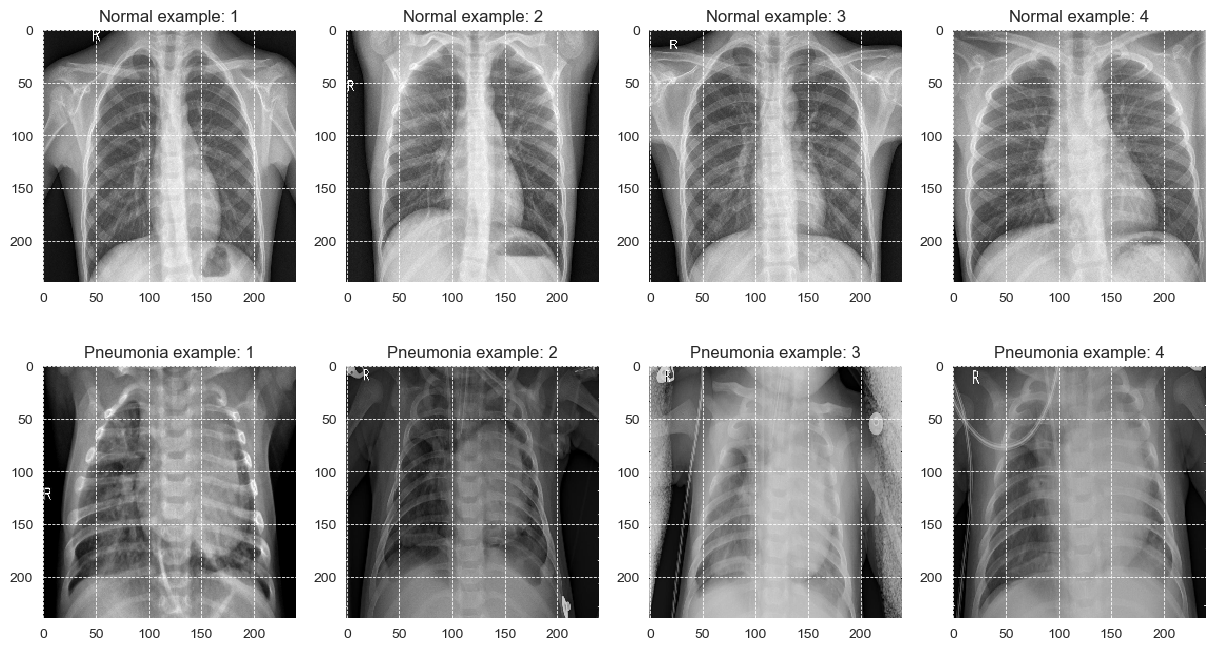

In [19]:
fig = plt.figure(figsize=(15, 8)) 

rows = 2
columns = 4

interpolation = 'None'

for i in range(4):
    tmpPosition = i+1
    tmpExample = i+1
    fig.add_subplot(rows, columns, tmpPosition) 
    plt.imshow(cv.cvtColor(imagesNorm[i], cv.COLOR_BGR2RGB), interpolation = interpolation, cmap='gray')
    plt.grid(color='white', linestyle='--', linewidth=.6)
    plt.title("Normal example: " + str(tmpExample))

for i in range(4):
    tmpPosition = i+5
    tmpExample = i+1
    fig.add_subplot(rows, columns, tmpPosition) 
    plt.imshow(cv.cvtColor(imagesPneumonia[i], cv.COLOR_BGR2RGB), interpolation = interpolation, cmap='gray')
    plt.grid(color='white', linestyle='--', linewidth=.6)
    plt.title("Pneumonia example: " + str(tmpExample))

plt.savefig('./plots/normal_pneumonia_examples.png')
plt.show()

## Plotting destribution of images in Test, Train, and Validation

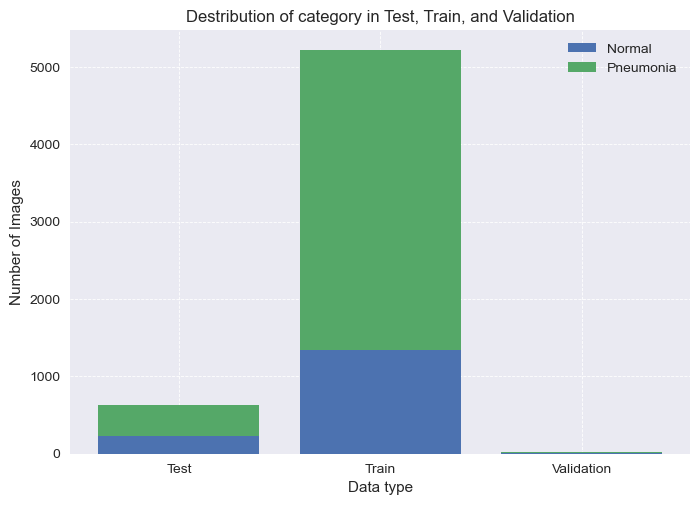

In [20]:
# Create a bar chart to visualize the distribution
plt.bar(titles, normal, zorder=3)
plt.bar(titles, pneumonia, bottom=normal, zorder=3)
plt.legend(['Normal', 'Pneumonia'])
plt.ylabel("Number of Images")
plt.xlabel('Data type')
plt.grid(linestyle = '--', zorder=0, linewidth=.6)
plt.title('Destribution of category in Test, Train, and Validation')
plt.savefig('./plots/normal_pneumonia_examples.png')
plt.savefig('./plots/normal_pneumonia_destribution.png')
plt.show()

## Plotting image size destribution

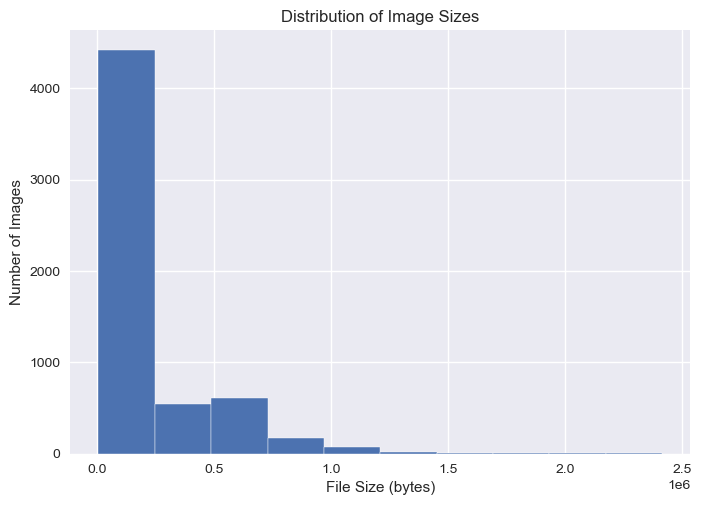

In [21]:
# Plot a histogram of the image sizes
plt.hist(sizes, edgecolor='white')
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.savefig('./plots/image_size_destribution.png')

plt.show()

## Plotting image resolution destribution 

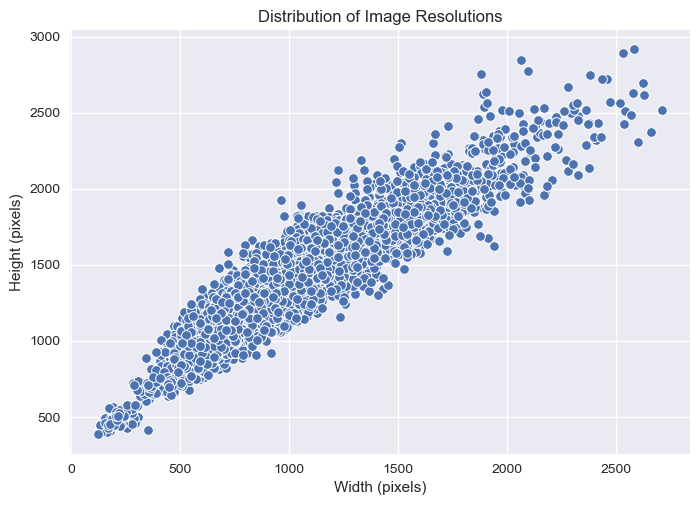

In [22]:

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1], edgecolors='white', linewidths=0.7)
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.savefig('./plots/image_resolution_destribution.png')
plt.show()

## Plotting image color destribution

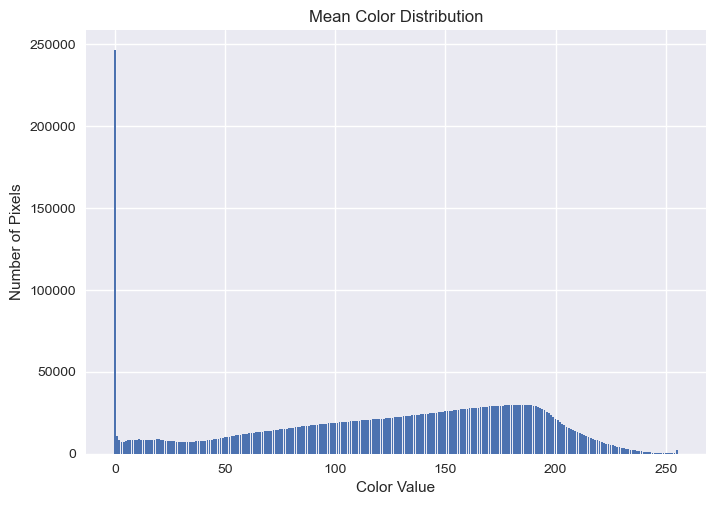

In [23]:

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.savefig('./plots/image_color_destribution.png')
plt.show()

File size 

https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a

https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b

Normalizing images: https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python 

Showing images: https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy

# Model generating

Opsætning af datainput + model: https://www.analyticsvidhya.com/blog/2021/07/step-by-step-guide-for-image-classification-on-custom-datasets/

Valg af loos function: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

Valg af optimizer: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

EfficientNet finetuning: https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

In [24]:
# Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

## VGG19

In [25]:
vgg19 = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [26]:
#do not train the pre-trained layers of VGG-19
for layer in vgg19.layers:
    layer.trainable = False

In [31]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\laerk\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [27]:
x_vgg19 = Flatten()(vgg19.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg19)
prediction = Dense(2, activation='softmax')(x_vgg19)

model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)

AttributeError: 'tuple' object has no attribute 'rank'

In [ ]:
# view the structure of the model
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_vgg19.compile(
  # loss='binary_crossentropy',
  loss='sparse_categorical_crossentropy',
  optimizer = "adam",
  metrics = ['accuracy']
)

In [ ]:
# fit the model
history_vgg19 = model_vgg19.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 420s 3s/step - loss: 0.1784 - accuracy: 0.9365 - val_loss: 0.1524 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 431s 3s/step - loss: 0.0876 - accuracy: 0.9684 - val_loss: 0.0564 - val_accuracy: 1.0000
Epoch 3/10
163/163 [==============================] - 418s 3s/step - loss: 0.0576 - accuracy: 0.9795 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 420s 3s/step - loss: 0.0354 - accuracy: 0.9862 - val_loss: 0.5870 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 414s 3s/step - loss: 0.0260 - accuracy: 0.9910 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 448s 3s/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 411s 3s/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.1061 - val_accuracy: 0.9375

In [ ]:
model_vgg19.save('./models/vgg19.keras')

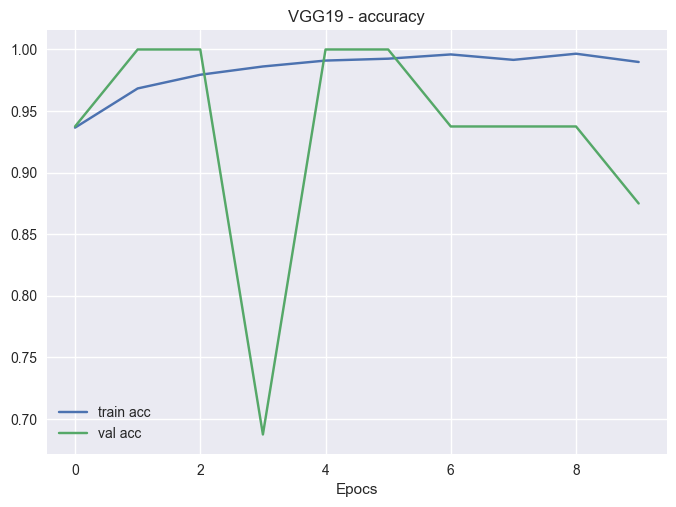

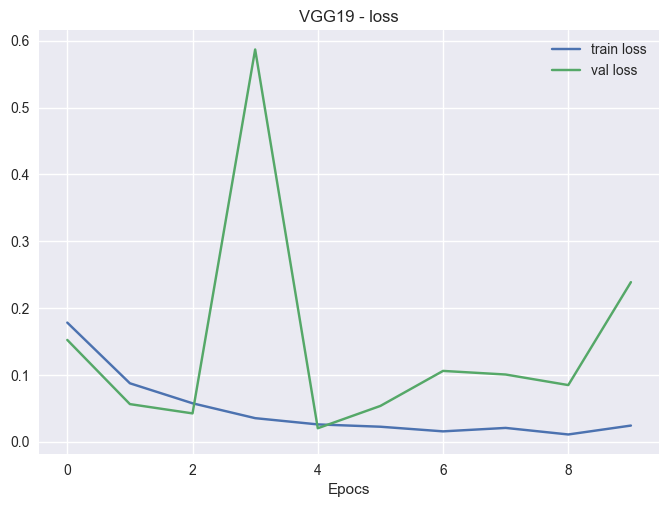

In [ ]:
# accuracies
plt.plot(history_vgg19.history['accuracy'], label='train acc')
plt.plot(history_vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG19 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/vgg19-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_vgg19.history['loss'], label='train loss')
plt.plot(history_vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.title("VGG19 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/vgg19-loss-rps-1.png')
plt.show()

In [ ]:
model_vgg19.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 50s 3s/step - loss: 1.5768 - accuracy: 0.7564


[1.5767587423324585, 0.7564102411270142]

In [ ]:
# predict
y_pred_vgg19 = model_vgg19.predict(x_test)
y_pred_vgg19 = np.argmax(y_pred_vgg19, axis=1)

20/20 [==============================] - 50s 2s/step


In [ ]:
# get classification report
print(classification_report(y_pred_vgg19,y_test))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        82
           1       1.00      0.72      0.84       542

    accuracy                           0.76       624
   macro avg       0.68      0.86      0.68       624
weighted avg       0.91      0.76      0.80       624



In [ ]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg19, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_vgg19, y_test).ravel()
(tn, fp, fn, tp)

(82, 0, 152, 390)

## VGG16

In [38]:
vgg16 = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [39]:
#do not train the pre-trained layers of VGG-16
for layer in vgg16.layers:
    layer.trainable = False

In [40]:
x_vgg16 = Flatten()(vgg16.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg16)
prediction = Dense(2, activation='softmax')(x_vgg16)

model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)

In [41]:
# view the structure of the model
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [42]:
model_vgg16.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [43]:
# fit the model
history_vgg16 = model_vgg16.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 339s 2s/step - loss: 0.1297 - accuracy: 0.9498 - val_loss: 0.2355 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 336s 2s/step - loss: 0.0491 - accuracy: 0.9829 - val_loss: 0.1769 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 335s 2s/step - loss: 0.0326 - accuracy: 0.9887 - val_loss: 0.4019 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 337s 2s/step - loss: 0.0202 - accuracy: 0.9942 - val_loss: 0.2856 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 334s 2s/step - loss: 0.0220 - accuracy: 0.9921 - val_loss: 0.2837 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 333s 2s/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.3967 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 330s 2s/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.3205 - val_accuracy: 0.8750

In [44]:
model_vgg16.save('./models/vgg16.keras')

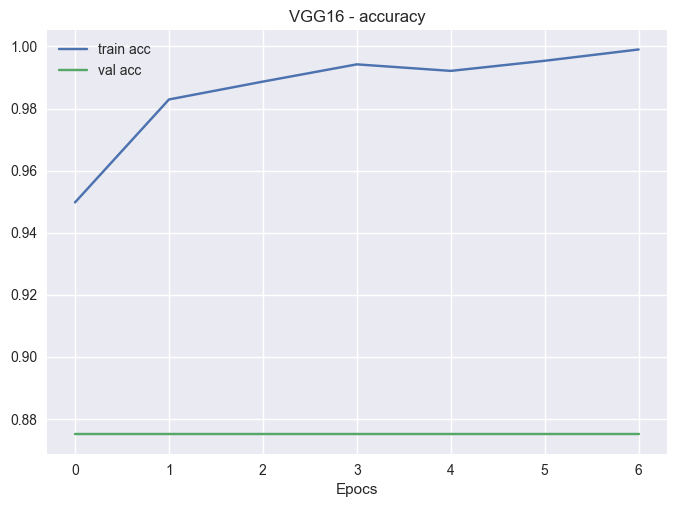

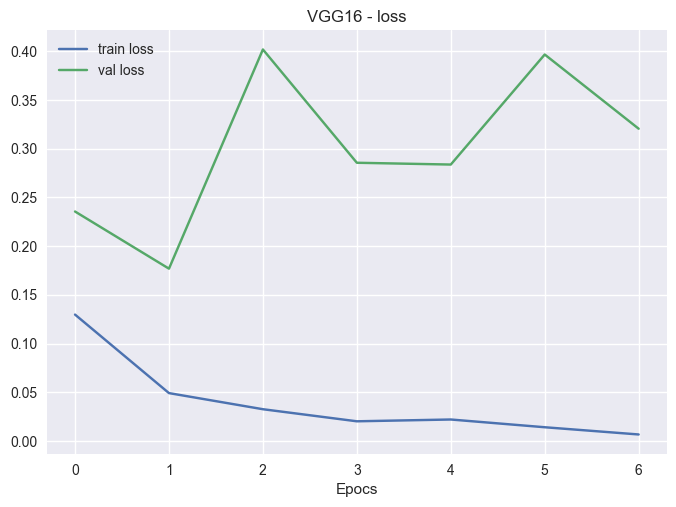

In [100]:
# accuracies
plt.plot(history_vgg16.history['accuracy'], label='train acc')
plt.plot(history_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG16 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/vgg16-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_vgg16.history['loss'], label='train loss')
plt.plot(history_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.title("VGG16 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/vgg16-loss-rps-1.png')
plt.show()

In [46]:
model_vgg16.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 39s 2s/step - loss: 1.1873 - accuracy: 0.7708


[1.1872984170913696, 0.7708333134651184]

In [47]:
# predict
y_pred_vgg16 = model_vgg16.predict(x_test)
y_pred_vgg16 = np.argmax(y_pred_vgg16, axis=1)

20/20 [==============================] - 39s 2s/step


In [48]:
# get classification report
print(classification_report(y_pred_vgg16, y_test))

              precision    recall  f1-score   support

           0       0.39      0.99      0.56        93
           1       1.00      0.73      0.84       531

    accuracy                           0.77       624
   macro avg       0.70      0.86      0.70       624
weighted avg       0.91      0.77      0.80       624



In [49]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg16, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_vgg16, y_test).ravel()
(tn, fp, fn, tp)

(92, 1, 142, 389)

## ResNet-50

In [50]:
rn50 = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [51]:
#do not train the pre-trained layers of VGG-19
for layer in rn50.layers:
    layer.trainable = False

In [52]:
x_rn50 = Flatten()(rn50.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg16)
prediction = Dense(2, activation='softmax')(x_rn50)

model_rn50 = Model(inputs=rn50.input, outputs=prediction)

In [53]:
# view the structure of the model
model_rn50.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [54]:
model_rn50.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [55]:
# fit the model
history_rn50 = model_rn50.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 173s 1s/step - loss: 0.6275 - accuracy: 0.8217 - val_loss: 0.9187 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 174s 1s/step - loss: 0.2490 - accuracy: 0.8993 - val_loss: 0.9218 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 174s 1s/step - loss: 0.2315 - accuracy: 0.9149 - val_loss: 2.6429 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 174s 1s/step - loss: 0.2207 - accuracy: 0.9164 - val_loss: 1.0604 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 174s 1s/step - loss: 0.1341 - accuracy: 0.9498 - val_loss: 1.0866 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 174s 1s/step - loss: 0.1177 - accuracy: 0.9569 - val_loss: 0.8932 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 174s 1s/step - loss: 0.1493 - accuracy: 0.9442 - val_loss: 1.0591 - val_accuracy: 0.6250

In [56]:
model_rn50.save('./models/rn50.keras')

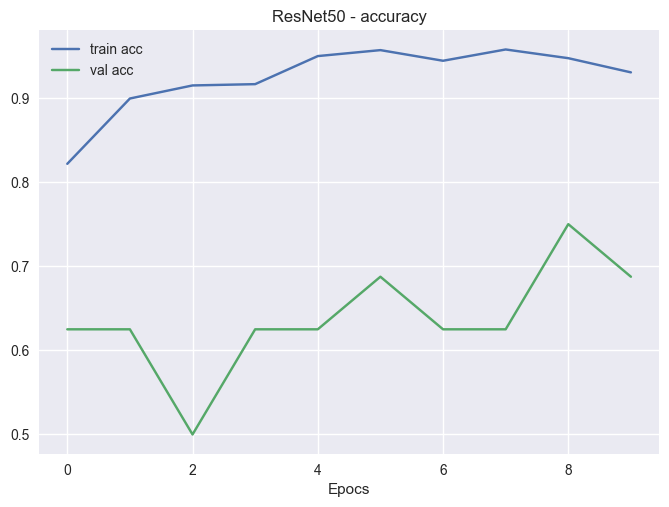

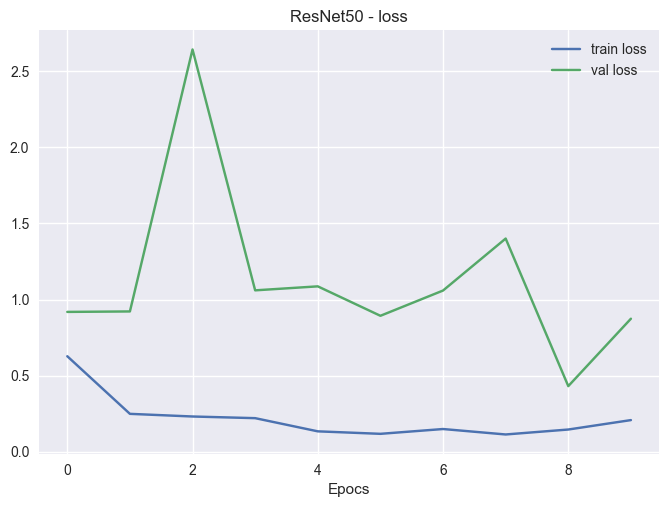

In [101]:
# accuracies
plt.plot(history_rn50.history['accuracy'], label='train acc')
plt.plot(history_rn50.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("ResNet50 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/rn50-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_rn50.history['loss'], label='train loss')
plt.plot(history_rn50.history['val_loss'], label='val loss')
plt.legend()
plt.title("ResNet50 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/rn50-loss-rps-1.png')
plt.show()

In [58]:
model_rn50.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 20s 1s/step - loss: 0.9284 - accuracy: 0.7324


[0.9284090995788574, 0.7323718070983887]

In [59]:
# predict
y_pred_rn50 = model_rn50.predict(x_test)
y_pred_rn50 = np.argmax(y_pred_rn50, axis=1)

20/20 [==============================] - 21s 1s/step


In [60]:
# get classification report
print(classification_report(y_pred_rn50, y_test))

              precision    recall  f1-score   support

           0       0.30      0.95      0.46        75
           1       0.99      0.70      0.82       549

    accuracy                           0.73       624
   macro avg       0.65      0.82      0.64       624
weighted avg       0.91      0.73      0.78       624



In [61]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg16, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_rn50, y_test).ravel()
(tn, fp, fn, tp)

(71, 4, 163, 386)

## Inception V3

In [62]:
iv3 = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [63]:
#do not train the pre-trained layers of VGG-19
for layer in iv3.layers:
    layer.trainable = False

In [64]:
x_iv3 = Flatten()(iv3.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg16)
prediction = Dense(2, activation='softmax')(x_iv3)

model_iv3 = Model(inputs=iv3.input, outputs=prediction)

In [65]:
# view the structure of the model
model_iv3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [66]:
model_iv3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [67]:
# fit the model
history_iv3 = model_iv3.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 89s 527ms/step - loss: 0.5481 - accuracy: 0.9321 - val_loss: 0.5768 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 86s 525ms/step - loss: 0.4064 - accuracy: 0.9544 - val_loss: 2.4533 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 85s 519ms/step - loss: 0.2617 - accuracy: 0.9730 - val_loss: 8.8186 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 84s 518ms/step - loss: 0.1540 - accuracy: 0.9791 - val_loss: 1.4337 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 85s 519ms/step - loss: 0.1212 - accuracy: 0.9833 - val_loss: 1.1184 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 85s 521ms/step - loss: 0.0545 - accuracy: 0.9889 - val_loss: 1.9096 - val_accuracy: 0.8750
Epoch 6: early stopping


In [68]:
model_iv3.save('./models/iv3.keras')

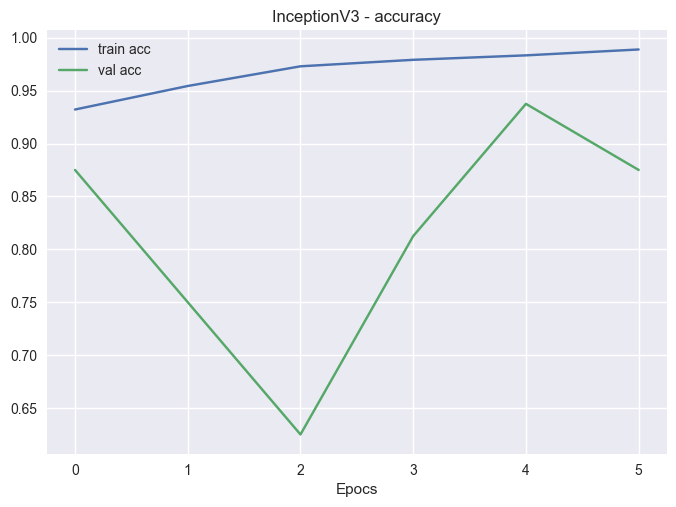

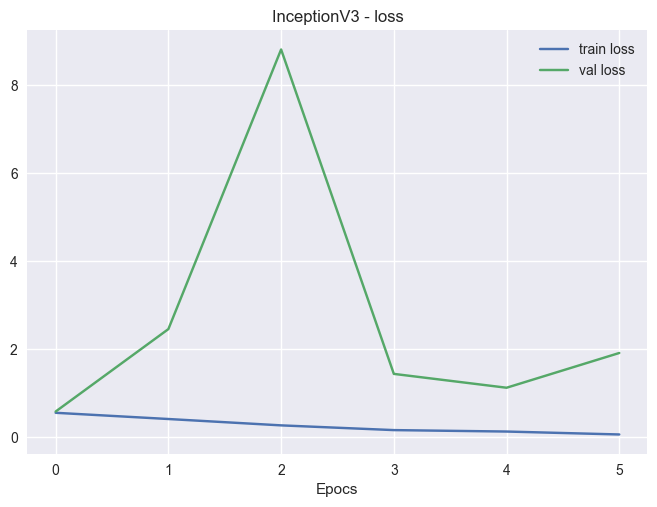

In [102]:
# accuracies
plt.plot(history_iv3.history['accuracy'], label='train acc')
plt.plot(history_iv3.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("InceptionV3 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/iv3-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_iv3.history['loss'], label='train loss')
plt.plot(history_iv3.history['val_loss'], label='val loss')
plt.legend()
plt.title("InceptionV3 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/iv3-loss-rps-1.png')
plt.show()

In [70]:
model_iv3.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 10s 501ms/step - loss: 4.2988 - accuracy: 0.8237


[4.298835277557373, 0.8237179517745972]

In [71]:
# predict
y_pred_iv3 = model_iv3.predict(x_test)
y_pred_iv3 = np.argmax(y_pred_iv3, axis=1)

20/20 [==============================] - 11s 499ms/step


In [72]:
# get classification report
print(classification_report(y_pred_iv3, y_test))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70       130
           1       0.99      0.78      0.88       494

    accuracy                           0.82       624
   macro avg       0.77      0.88      0.79       624
weighted avg       0.90      0.82      0.84       624



In [73]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg16, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_iv3, y_test).ravel()
(tn, fp, fn, tp)

(127, 3, 107, 387)

## EfficientNetB0

In [74]:
enb0 = EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

16705208/16705208 [==============================] - 2s 0us/step


In [75]:
#do not train the pre-trained layers of VGG-19
for layer in enb0.layers:
    layer.trainable = False

In [76]:
x_enb0 = Flatten()(enb0.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg16)
prediction = Dense(2, activation='softmax')(x_enb0)

model_enb0 = Model(inputs=enb0.input, outputs=prediction)

In [77]:
# view the structure of the model
model_enb0.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_5[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

In [78]:
model_enb0.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [79]:
# fit the model
history_enb0 = model_enb0.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 99s 588ms/step - loss: 1.2679 - accuracy: 0.6484 - val_loss: 0.8704 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 96s 588ms/step - loss: 1.1026 - accuracy: 0.6306 - val_loss: 1.0019 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 96s 586ms/step - loss: 0.8598 - accuracy: 0.6513 - val_loss: 0.6808 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 96s 590ms/step - loss: 0.9724 - accuracy: 0.6373 - val_loss: 0.7825 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 96s 591ms/step - loss: 1.2509 - accuracy: 0.6355 - val_loss: 1.2906 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 95s 586ms/step - loss: 1.1003 - accuracy: 0.6382 - val_loss: 0.8880 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 95s 584ms/step - loss: 1.1301 - accuracy: 0.6472 - val_loss: 2.7937 - val_ac

In [80]:
model_enb0.save('./models/enb0.keras')

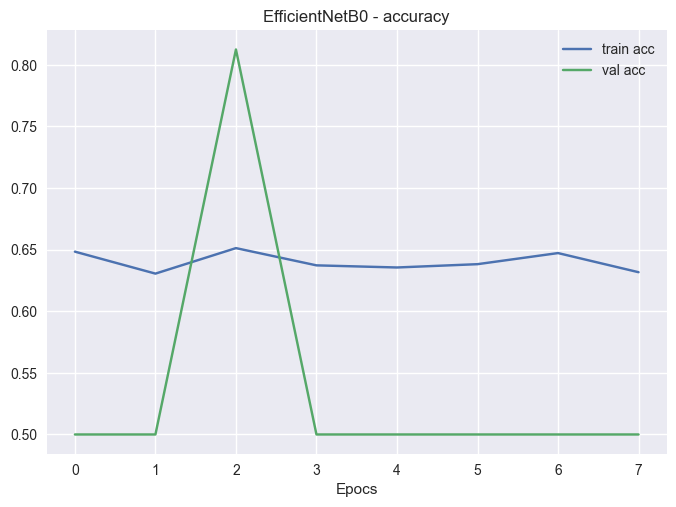

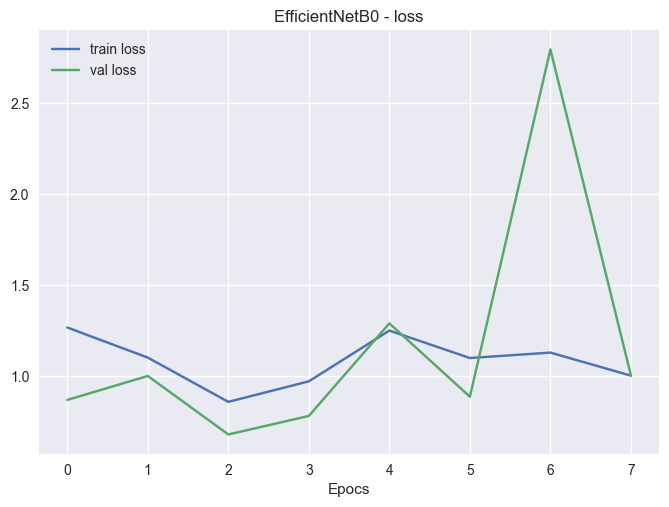

In [103]:
# accuracies
plt.plot(history_enb0.history['accuracy'], label='train acc')
plt.plot(history_enb0.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("EfficientNetB0 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/enb0-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_enb0.history['loss'], label='train loss')
plt.plot(history_enb0.history['val_loss'], label='val loss')
plt.legend()
plt.title("EfficientNetB0 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/enb0-loss-rps-1.png')
plt.show()

In [82]:
model_enb0.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 12s 576ms/step - loss: 0.7775 - accuracy: 0.6250


[0.7775428295135498, 0.625]

In [83]:
# predict
y_pred_enb0 = model_enb0.predict(x_test)
y_pred_enb0 = np.argmax(y_pred_enb0, axis=1)

20/20 [==============================] - 12s 562ms/step


In [84]:
# get classification report
print(classification_report(y_pred_enb0, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77       624

    accuracy                           0.62       624
   macro avg       0.50      0.31      0.38       624
weighted avg       1.00      0.62      0.77       624



C:\Users\laerk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laerk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laerk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [85]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg16, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_enb0, y_test).ravel()
(tn, fp, fn, tp)

(0, 0, 234, 390)

## EfficientNetB7

In [19]:
enb7 = EfficientNetB7(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [20]:
#do not train the pre-trained layers of VGG-19
for layer in enb7.layers:
    layer.trainable = False

In [21]:
x_enb7 = Flatten()(enb7.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg16)
prediction = Dense(2, activation='softmax')(x_enb7)

model_enb7 = Model(inputs=enb7.input, outputs=prediction)

AttributeError: 'tuple' object has no attribute 'rank'

In [ ]:
# view the structure of the model
model_enb7.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

In [ ]:
model_enb7.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
# fit the model
history_enb7 = model_enb7.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 735s 4s/step - loss: 7.4625 - accuracy: 0.6294 - val_loss: 2.8892 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 824s 5s/step - loss: 9.3336 - accuracy: 0.6145 - val_loss: 19.6138 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 614s 4s/step - loss: 6.0946 - accuracy: 0.6131 - val_loss: 7.7081 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 618s 4s/step - loss: 6.3553 - accuracy: 0.6250 - val_loss: 18.0148 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 624s 4s/step - loss: 4.6714 - accuracy: 0.6290 - val_loss: 22.7056 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 619s 4s/step - loss: 6.8775 - accuracy: 0.6329 - val_loss: 0.6150 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 621s 4s/step - loss: 4.4180 - accuracy: 0.6189 - val_loss: 0.6907 - val_accuracy: 0.5

In [ ]:
model_enb7.save('./models/enb7.keras')

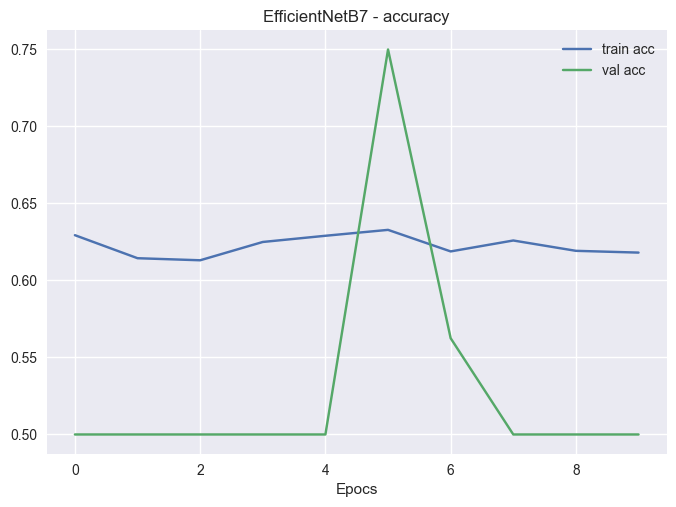

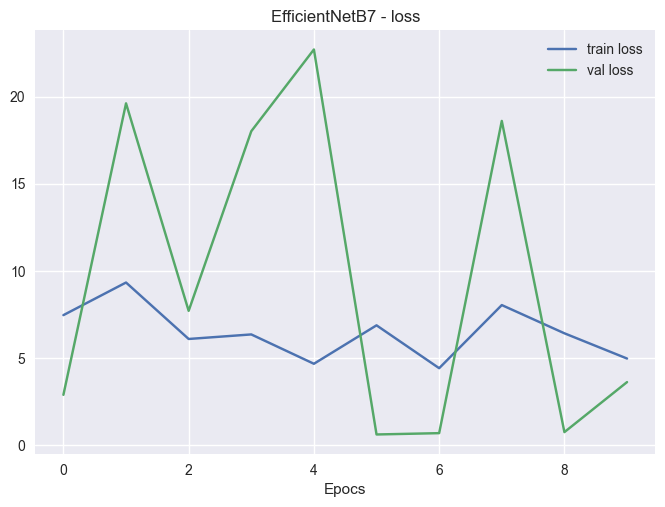

In [ ]:
# accuracies
plt.plot(history_enb7.history['accuracy'], label='train acc')
plt.plot(history_enb7.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("EfficientNetB7 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/enb7-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_enb7.history['loss'], label='train loss')
plt.plot(history_enb7.history['val_loss'], label='val loss')
plt.legend()
plt.title("EfficientNetB7 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/enb7-loss-rps-1.png')
plt.show()

In [ ]:
model_enb7.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 73s 4s/step - loss: 2.5291 - accuracy: 0.6106


[2.529100179672241, 0.6105769276618958]

In [ ]:
# predict
y_pred_enb7 = model_enb7.predict(x_test)
y_pred_enb7 = np.argmax(y_pred_enb7, axis=1)

20/20 [==============================] - 77s 4s/step


In [ ]:
# get classification report
print(classification_report(y_pred_enb7, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.98      0.62      0.76       615

    accuracy                           0.61       624
   macro avg       0.49      0.31      0.38       624
weighted avg       0.96      0.61      0.75       624



In [ ]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg16, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_enb7, y_test).ravel()
(tn, fp, fn, tp)

(0, 9, 234, 381)

## Custom model

papers model:
- batches of 1000 images
- adam optimizer
- learning rate of 0.001
- 100 epocs 

Inception?: 
- initialize the convolutional layers with loaded pretrained weights
- retrain final softmax layer 

Transfer learning is when we add all the new layers on top of the pretrained models


In [38]:
def create_model(neurons, optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=(None, 224, 224, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmond'))
    # model.add(Dense(64, activation='relu'))
    # model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [39]:
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

In [40]:
model = KerasClassifier(build_fn=create_model, epochs=10, verbose=1)

In [41]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [42]:
grid_result = grid.fit(x_train, y_train)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
grid_result.best_score_

In [ ]:
grid_result.best_params_

In [ ]:
grid_result.best_estimator_

In [ ]:
enb7 = EfficientNetB7(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

258076736/258076736 [==============================] - 25s 0us/step


In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in enb7.layers:
    layer.trainable = False

In [ ]:
x_enb7 = Flatten()(enb7.output)

# adding output layer.sigmoid classifier is used as it is binary-class classification
# prediction = Dense(1, activation='sigmoid')(x_vgg16)
prediction = Dense(2, activation='softmax')(x_enb7)

model_enb7 = Model(inputs=enb7.input, outputs=prediction)

In [ ]:
# view the structure of the model
model_enb7.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

In [ ]:
model_enb7.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
# fit the model
history_enb7 = model_enb7.fit(
  x_train,
  y_train,
  validation_data = (x_val, y_val),
  epochs = 10,
  callbacks = [early_stop],
  batch_size = 32, 
  shuffle = True
)

Epoch 1/10
163/163 [==============================] - 735s 4s/step - loss: 7.4625 - accuracy: 0.6294 - val_loss: 2.8892 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 824s 5s/step - loss: 9.3336 - accuracy: 0.6145 - val_loss: 19.6138 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 614s 4s/step - loss: 6.0946 - accuracy: 0.6131 - val_loss: 7.7081 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 618s 4s/step - loss: 6.3553 - accuracy: 0.6250 - val_loss: 18.0148 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 624s 4s/step - loss: 4.6714 - accuracy: 0.6290 - val_loss: 22.7056 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 619s 4s/step - loss: 6.8775 - accuracy: 0.6329 - val_loss: 0.6150 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 621s 4s/step - loss: 4.4180 - accuracy: 0.6189 - val_loss: 0.6907 - val_accuracy: 0.5

In [ ]:
model_enb7.save('./models/enb7.keras')

In [ ]:
# accuracies
plt.plot(history_enb7.history['accuracy'], label='train acc')
plt.plot(history_enb7.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("EfficientNetB7 - accuracy")
plt.xlabel("Epocs")
plt.savefig('./plots/enb7-acc-rps-1.png')
plt.show()

# loss
plt.plot(history_enb7.history['loss'], label='train loss')
plt.plot(history_enb7.history['val_loss'], label='val loss')
plt.legend()
plt.title("EfficientNetB7 - loss")
plt.xlabel("Epocs")
plt.savefig('./plots/enb7-loss-rps-1.png')
plt.show()

In [ ]:
model_enb7.evaluate(x_test, y_test, batch_size=32)

In [ ]:
# predict
y_pred_enb7 = model_enb7.predict(x_test)
y_pred_enb7 = np.argmax(y_pred_enb7, axis=1)

In [ ]:
# get classification report
print(classification_report(y_pred_enb7, y_test))

In [ ]:
# get confusion matrix
# print(confusion_matrix(y_pred_vgg16, y_test))

tn, fp, fn, tp = confusion_matrix(y_pred_enb7, y_test).ravel()
(tn, fp, fn, tp)

# Evaluation

TN, TP, FN, FP